### **HW1-FRA503 Machine Learning**

### **Objective Goals**

The purposes of this project are:

  1. to gain experience with data preprocessing including data observation, data cleaning, feature selection and feature extraction.
  2. to gain skills with Python coding for data analysis, model construction and result analysis.
  3. to study and analyse data correlation of the 2023 government election in Thailand 
  4. to study the government elective system in Thailand 

### **Due date**
Tuesday 31/10/2023

### **Authors**


1. Natchanon Singha        64340500017

2. Thanaphan Rueangsuk     64340500025

### **Instructions**

1. You have to work on this project with classmates (1-3 people per group).
2. You must use the Python notebook (files.ipynb) for your written report to explain the processes of building the machine learning models.
3. The report must contain the contents following “Project Assignment”.

### **Project Assignment**

**Your notebook must contain the following contents:**

**1. Data Exploration**
- How many attributes in the dataset
- Observations of good and bad things about the dataset 
- List of all attributes that you would keep or remove from the dataset and why 

**2. Data Preprocessing**
- Missing Values 
- Feature Selection 
- Feature extraction

**3. Model Construction (Linear and Logistic regression model)**
- Code (Python) description
- Experimentation with different preprocessing
- Experimentation with different testing modes
- Presentation of resulting model and evaluation
- Observations and analysis of results




## 1. Data Exploration


The dataset that will be used for analysis and modeling machine learning is taken from https://drive.google.com/drive/folders/1ZiGHe1q6rD-4qi0rhJBOJXvfck-0UE_P.


**You can elaborate more on your dataset such as the number and the meaning of attributes or problems arising in the dataset before using in the modeling.**

Import libary(s) and Access to the Dataset
- Import Pandas and Numpy to process the dataset.
- Using read_excel() to read the excel file(s).

**Exporting all of Schema from the dataset**

From the ECT dataset, there  9 sub-sheats, 48 features which shown below. 

In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties
# font_path = "font\Kanit-Regular.ttf"
# font_properties = FontProperties(fname=font_path)
# sns.set(font=font_properties.get_name())

In [272]:
df_rcp = pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='result_constituencies_PartyList') 
df_inpro =  pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='info_province') 
df_prov =   pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='info_party_overview') 

schema = pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='Schema')
selected_col = ['Sheet', 'Column', 'Description','Data Type_!']
schema = schema[selected_col]
schema

,Sheet,Column,Description,Data Type_!
0,Candidate_Constituency,mp_app_id,Candidate ID,string
1,Candidate_Constituency,mp_app_no,Candidate Name,number
2,Candidate_Constituency,mp_app_party_id,Party code,string
3,Candidate_Constituency,mp_app_name,Candidate Name,string
4,Candidate_Constituency,image_url,The URL of Candidate img,string
5,Candidate_PartyList,party_no,Party No,string
6,Candidate_PartyList,list_no,Candidate List,string
7,Candidate_PartyList,name,Candidate Name,string
8,Candidate_PartyList,image_url,The URL of Candidate img,string
9,Candidate_PM,party_no,Party No,string


In [273]:
df_rcp

,cons_id,party_id,party_list_vote,party_list_vote_percent
0,ACR_1,701,4550,4.30977
1,ACR_1,702,185,0.17523
2,ACR_1,703,67,0.06346
3,ACR_1,705,33576,31.80328
4,ACR_1,706,132,0.12503
...,...,...,...,...
26795,YST_3,780,145,0.13871
26796,YST_3,781,412,0.39414
26797,YST_3,783,17,0.01626
26798,YST_3,784,138,0.13202


In [274]:
valid_provinces = ['ACR','BKN','BRM','CPM','KKN','KSN','LEI','MDH','MKM','NBP','NKI','NMA','NPM','RET','SNK','SRN','SSK','UBN','UDN','YST']

In [275]:
df_inpro

,province_id,prov_id,province,eng,abbre_thai,total_registered_vote,total_vote_stations
0,37,ACR,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
1,15,ATG,อ่างทอง,ANG THONG,อท,224656,492
2,14,AYA,พระนครศรีอยุธยา,PHRA NAKHON SI AYUTTHAYA,อย,664431,1060
3,10,BKK,กรุงเทพมหานคร,BANGKOK,กทม,4479155,6360
4,38,BKN,บึงกาฬ,BUENG KAN,บก,327745,652
...,...,...,...,...,...,...,...
72,41,UDN,อุดรธานี,UDON THANI,อด,1248824,2252
73,61,UTI,อุทัยธานี,UTHAI THANI,อน,260983,617
74,53,UTT,อุตรดิตถ์,UTTARADIT,อต,368323,732
75,95,YLA,ยะลา,YALA,ยล,382271,596


In [276]:
df_prov

,id,party_no,name,abbr,color,logo_url
0,701,26.0,ประชาธิปัตย์,ปชป.,#06aff3,https://cdn.ectreport.com/images/logos/ประชาธิ...
1,702,63.0,ประชากรไทย,ปชท.,#0f41ce,https://cdn.ectreport.com/images/logos/ประชากร...
2,703,60.0,ความหวังใหม่,ควม.,#e6b750,https://cdn.ectreport.com/images/logos/ความหวั...
3,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...
4,706,14.0,ชาติพัฒนากล้า,ชพก.,#233e8a,https://cdn.ectreport.com/images/logos/ชาติพัฒ...
...,...,...,...,...,...,...
65,780,55.0,ไทยก้าวหน้า,ทกน.,#b9bee3,https://cdn.ectreport.com/images/logos/ไทยก้าว...
66,781,9.0,พลัง,พ.,#8e8fc7,https://cdn.ectreport.com/images/logos/พลัง.png
67,783,52.0,ชาติรุ่งเรือง,ชรร.,#9cb4c9,https://cdn.ectreport.com/images/logos/ชาติรุ่...
68,784,23.0,รวมใจไทย,ร.จ.ท.,#eec49a,https://cdn.ectreport.com/images/logos/รวมใจไท...


In [277]:
df_inpro_drop = df_inpro.copy()
df_inpro_drop = df_inpro_drop.drop(columns=['province_id','province','abbre_thai','total_vote_stations'], axis=1)
df_inpro_drop

,prov_id,eng,total_registered_vote
0,ACR,AMNAT CHAROEN,301354
1,ATG,ANG THONG,224656
2,AYA,PHRA NAKHON SI AYUTTHAYA,664431
3,BKK,BANGKOK,4479155
4,BKN,BUENG KAN,327745
...,...,...,...
72,UDN,UDON THANI,1248824
73,UTI,UTHAI THANI,260983
74,UTT,UTTARADIT,368323
75,YLA,YALA,382271


In [278]:
df_inpro_drop = df_inpro_drop[df_inpro_drop['prov_id'].isin(valid_provinces)].reset_index(drop=True).rename(columns={'prov_id':'cons_id'})
df_inpro_drop

,cons_id,eng,total_registered_vote
0,ACR,AMNAT CHAROEN,301354
1,BKN,BUENG KAN,327745
2,BRM,BURI RAM,1250148
3,CPM,CHAIYAPHUM,902888
4,KKN,KHON KAEN,1449595
5,KSN,KALASIN,788214
6,LEI,LOEI,504875
7,MDH,MUKDAHAN,276802
8,MKM,MAHA SARAKHAM,774191
9,NBP,NONG BUA LAM PHU,405513


In [279]:
df_prov_drop = df_prov.copy()
df_prov_drop = df_prov_drop.drop(columns=['abbr','color','logo_url','party_no'], axis=1).rename(columns={'id':'party_id'})
df_prov_drop

,party_id,name
0,701,ประชาธิปัตย์
1,702,ประชากรไทย
2,703,ความหวังใหม่
3,705,เพื่อไทย
4,706,ชาติพัฒนากล้า
...,...,...
65,780,ไทยก้าวหน้า
66,781,พลัง
67,783,ชาติรุ่งเรือง
68,784,รวมใจไทย


In [280]:
df_rcp_drop = df_rcp.copy()
df_rcp_drop = df_rcp_drop[df_rcp_drop['cons_id'].str.contains('|'.join(valid_provinces))].reset_index(drop=True)
df_rcp_drop = df_rcp_drop.drop(columns=('party_list_vote_percent'), axis=1)
df_rcp_drop

,cons_id,party_id,party_list_vote
0,ACR_1,701,4550
1,ACR_1,702,185
2,ACR_1,703,67
3,ACR_1,705,33576
4,ACR_1,706,132
...,...,...,...
8906,YST_3,780,145
8907,YST_3,781,412
8908,YST_3,783,17
8909,YST_3,784,138


In [281]:
# Extract the first three characters of 'cons_id' and 'name'
df_rcp_drop['cons_id_3_chars'] = df_rcp_drop['cons_id'].str[:3]

# Group by the first three characters of 'cons_id' and 'name' and 'party_id'
sum_df = df_rcp_drop.groupby(['cons_id_3_chars', 'party_id'])['party_list_vote'].sum().reset_index()
sum_df = sum_df.rename(columns={'cons_id_3_chars' : 'cons_id'})
sum_df

,cons_id,party_id,party_list_vote
0,ACR,701,6912
1,ACR,702,374
2,ACR,703,108
3,ACR,705,69819
4,ACR,706,209
...,...,...,...
1335,YST,780,305
1336,YST,781,1941
1337,YST,783,63
1338,YST,784,1032


In [282]:
# merge_df = sum_df.merge(df_prov_drop, on=['party_id'], how='outer')
# merge_df.fillna(0, inplace=True)
# # Remove rows where 'cons_id' is 0
# merge_df = merge_df[merge_df['cons_id'] != 0]
# merge_df = merge_df.sort_values(by=['cons_id','party_id'])
# # Reset the index if needed
# merge_df = merge_df.reset_index(drop=True)
# merge_df

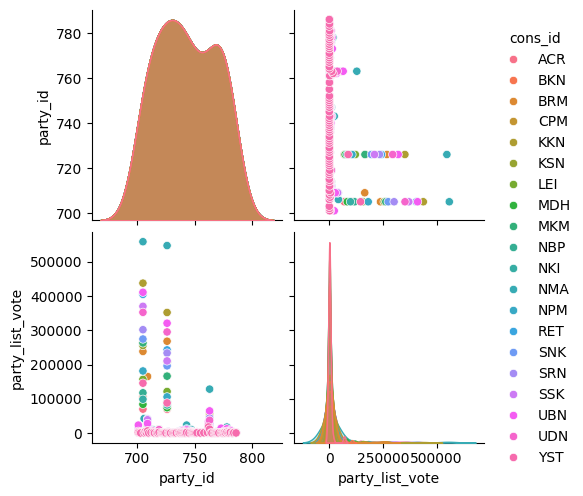

In [283]:
sns.pairplot(sum_df,hue='cons_id')

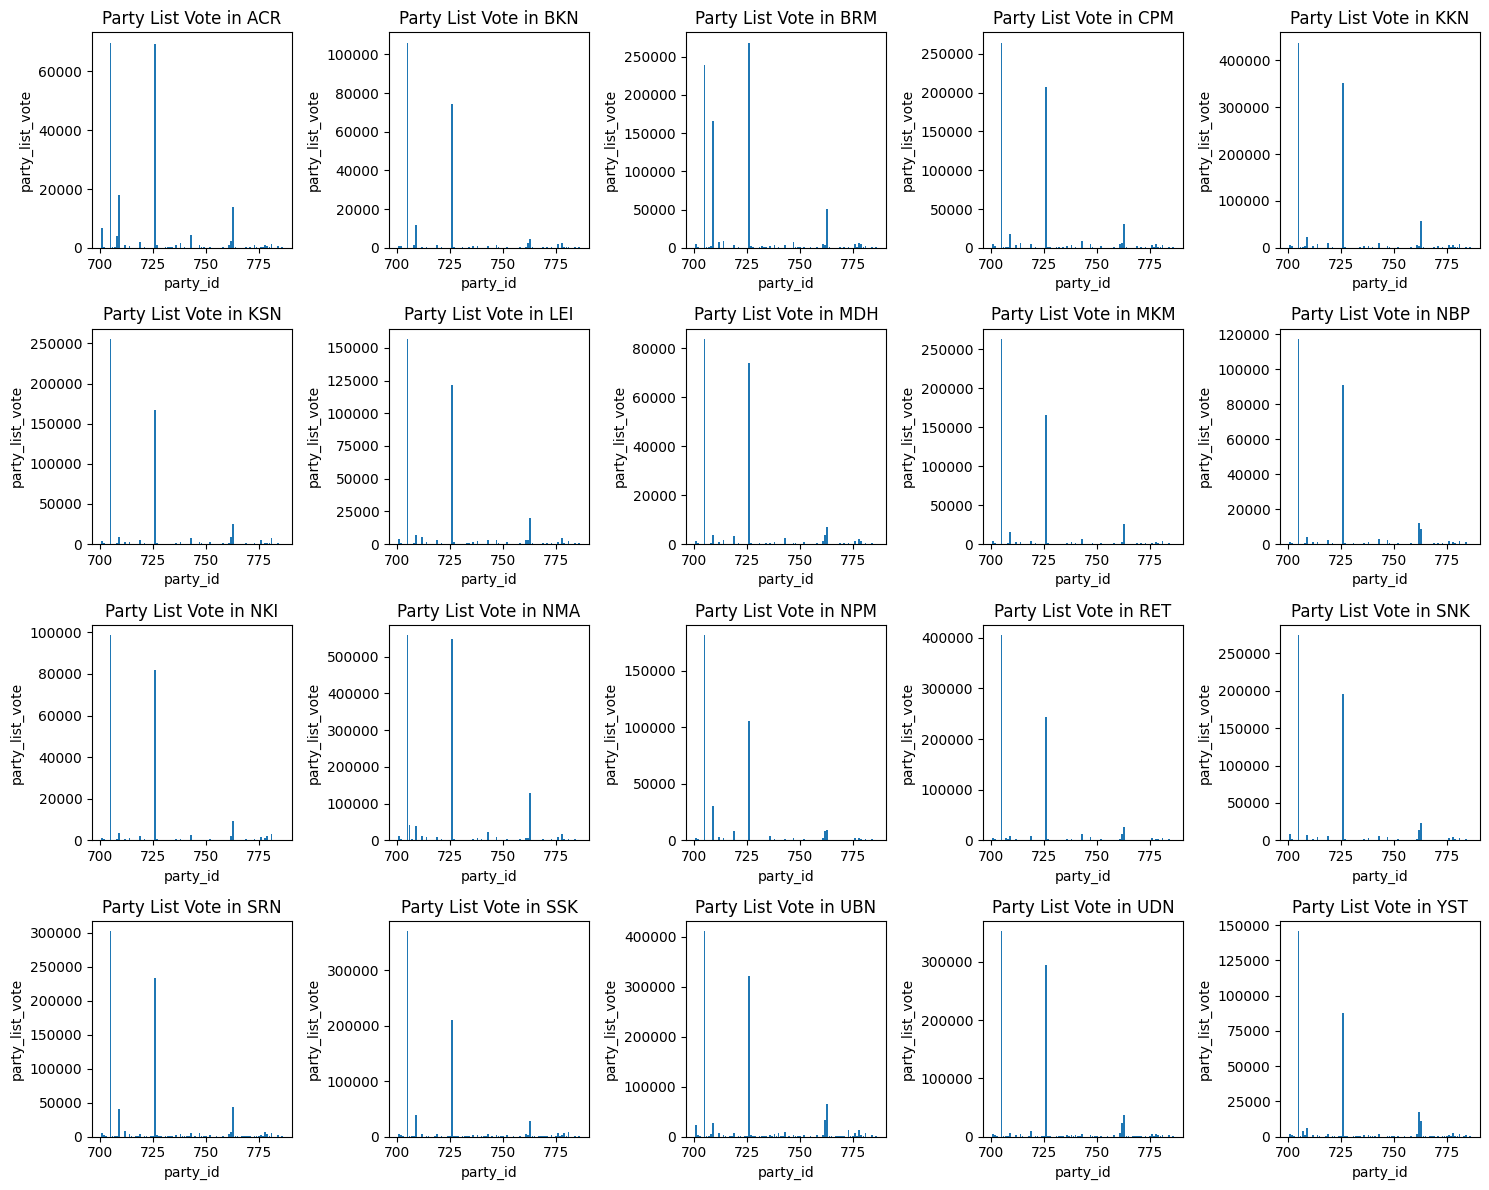

In [284]:
# Calculate the number of rows and columns for the grid
num_rows = 4
num_columns = 5

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 12))

# Flatten the 4x5 grid of subplots into a 1D array for easier iteration
axes = axes.ravel()

# Iterate through the selected constituencies
for i, cons_id in enumerate(valid_provinces):
    cons_df = sum_df[sum_df["cons_id"] == cons_id]
    grouped_df = cons_df.groupby("party_id")["party_list_vote"].sum().reset_index()
    grouped_df = grouped_df.sort_values(by="party_list_vote", ascending=False)

    # Select the subplot for the current constituency
    ax = axes[i]

    # Plot the data on the selected subplot
    ax.bar(grouped_df["party_id"], grouped_df["party_list_vote"])
    ax.set_title(f'Party List Vote in {cons_id}')
    ax.set_xlabel("party_id")
    ax.set_ylabel("party_list_vote")

# Hide any remaining empty subplots
for i in range(len(valid_provinces), num_rows * num_columns):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

In [285]:
sum_df.isnull().sum()

cons_id            0
party_id           0
party_list_vote    0
dtype: int64

In [286]:
# Pivot the DataFrame
pivoted_df = sum_df.pivot(index='cons_id', columns='party_id', values='party_list_vote').reset_index()

# Rename columns and fill NaN values with 0
pivoted_df.columns = [f'party_{col}' if col != 'cons_id' else col for col in pivoted_df.columns]
pivoted_df = pivoted_df.fillna(0)

# Find the party with the most votes for each cons_id
party_id = pivoted_df.iloc[:, 1:].idxmax(axis=1)

# Create a new column to store the result
pivoted_df['party_id'] = party_id.str.split('_').str.get(1)

# Assuming df_prov_drop['party_id'] is a string data type, convert it to int64
pivoted_df['party_id'] = pivoted_df['party_id'].astype('int64')

pivoted_df


,cons_id,party_701,party_702,party_703,party_705,party_706,party_707,party_708,party_709,party_710,...,party_776,party_777,party_778,party_779,party_780,party_781,party_783,party_784,party_786,party_id
0,ACR,6912,374,108,69819,209,154,4077,18020,25,...,350,175,1107,623,275,1361,24,502,197,705
1,BKN,964,694,56,106129,170,158,1515,11571,11,...,1777,169,2565,589,226,446,23,579,174,705
2,BRM,4825,1606,189,238341,764,517,2800,165154,96,...,5115,672,6214,5379,839,1930,76,1417,871,726
3,CPM,4479,1789,202,264298,643,787,999,18131,94,...,3044,536,4434,1515,780,3113,72,1582,680,705
4,KKN,6287,2991,295,437908,1616,2425,2896,23139,132,...,6071,754,5129,1055,965,8688,128,1698,954,705
5,KSN,3580,1837,460,255619,514,508,1277,9416,67,...,5031,442,1753,1523,792,7791,64,1334,501,705
6,LEI,3797,1076,103,156863,396,392,693,6891,44,...,1557,334,4344,1043,384,2654,38,896,468,705
7,MDH,1224,494,77,83864,229,223,436,3768,18,...,1171,183,2059,1059,234,547,32,491,216,705
8,MKM,3533,1839,178,263273,637,436,964,14961,65,...,1600,390,2846,1338,508,4400,44,894,473,705
9,NBP,1380,840,63,117503,200,195,390,4229,74,...,1980,232,913,774,237,1619,21,1114,199,705


In [287]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

# Encode 'most_vote_party'
label_encoder = LabelEncoder()
pivoted_df['party_id'] = label_encoder.fit_transform(pivoted_df['party_id'])

# Perform one-hot encoding for 'cons_id'
merge_df = pd.get_dummies(pivoted_df, columns=['cons_id'], prefix='cons_id')

# Define your features (X) and target (y)
X = merge_df.drop('party_id', axis=1)
y = merge_df['party_id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a DecisionTreeClassifier object
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_model.predict(X_train)

print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         1

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion matrix 
[[14  0]
 [ 0  1]]


<Figure size 640x480 with 0 Axes>

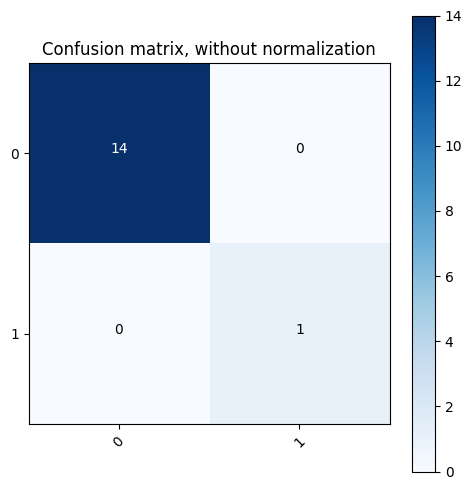

In [288]:
# Compute confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
  plt.figure(figsize=(5,5))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
class_names = list(set(y_train))
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [289]:
#Predict on training set
y_pred = dt_model.predict(X_test)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion matrix 
[[5]]


<Figure size 640x480 with 0 Axes>

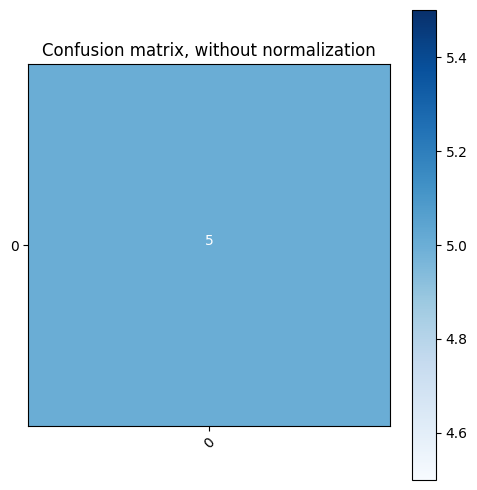

In [293]:
class_names = list(set(y_test))
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [290]:
# Merge the DataFrames
merge_df = pivoted_df.merge(df_prov_drop, on=['party_id'], how='outer')

# Remove rows with NaN data
merge_df = merge_df.dropna()

# Reset the index
merge_df = merge_df.reset_index(drop=True)

merge_df

,cons_id,party_701,party_702,party_703,party_705,party_706,party_707,party_708,party_709,party_710,...,party_777,party_778,party_779,party_780,party_781,party_783,party_784,party_786,party_id,name


In [291]:
# Extract the 'cons_id' column
cons_id = pivoted_df['cons_id']

# Extract the party columns (party_701, party_702, ...)
party_columns = pivoted_df.drop('cons_id', axis=1)

# Find the column with the maximum value in each row
max_party = party_columns.idxmax(axis=1)

# Replace the column names with 1 if it's the maximum, 0 otherwise
one_hot_encoded_df = party_columns.eq(party_columns.max(axis=1), axis=0).astype(int)

# Add back the 'cons_id' column to the front
one_hot_encoded_df = pd.concat([cons_id, one_hot_encoded_df], axis=1)

one_hot_encoded_df

,cons_id,party_701,party_702,party_703,party_705,party_706,party_707,party_708,party_709,party_710,...,party_776,party_777,party_778,party_779,party_780,party_781,party_783,party_784,party_786,party_id
0,ACR,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BKN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BRM,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CPM,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KKN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,KSN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,LEI,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,MDH,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,MKM,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,NBP,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


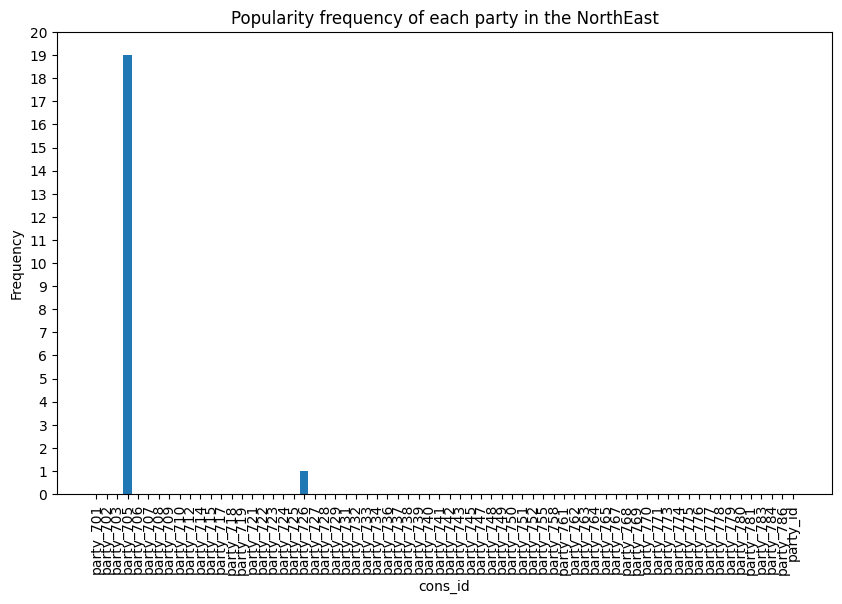

In [292]:
# Calculate the frequency of non-zero values for columns 701 to 786
non_zero_counts = one_hot_encoded_df.iloc[:, 1:].sum()

# Create a histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(non_zero_counts.index, non_zero_counts)
plt.xlabel('cons_id')
plt.ylabel('Frequency')
plt.title('Popularity frequency of each party in the NorthEast')
plt.xticks(rotation=90)
plt.yticks(range(0, 21, 1))
plt.show()